In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

In [5]:
df = None
with open("covid_flow.pkl", "rb") as f:
    df = pickle.load(f)
df["case"] = df.index
df["t_point"] = df["t_point"].apply(lambda x: x[2:])
df["t_point"] = df["t_point"].apply(lambda x: int(x))
df.set_index(["case", "t_point"], inplace=True)
df = df.sort_values(["case", "t_point"])
rename_dict = {i: i[:-11] for i in df.columns[29:43]}
df = df.rename(columns = rename_dict)
df

омепразол_stat_control  надропарин кальция_stat_control  \
case    t_point                                                            
GACAAcY 0                             1                                1   
        1                             1                                1   
        2                             1                                1   
        3                             1                                1   
GACAAnf 0                             1                                1   
...                                 ...                              ...   
GACBB;O 0                             0                                0   
        1                             0                                0   
GACXAAB 0                             1                                0   
        1                             1                                0   
        2                             1                                0   

                 эзомепразол_stat_control  амлодипин_stat_control  \
case    t_point                                                     
GACAAcY 0                               1                       1   
        1                               1                       1   
        2                               1                       1   
        3                               1                       1   
GACAAnf 0                               1                       1   
...                                   ...                     ...   
GACBB;O 0                               0                       1   
        1                               0                       1   
GACXAAB 0                               1                       1   
        1                               1                       1   
        2                               1                       1   

                 амброксол_stat_control  домперидон_stat_control  \
case    t_point                                                    
GACAAcY 0                             1                        1   
        1                             1                        1   
        2                             1                        1   
        3                             1                        1   
GACAAnf 0                             1                        1   
...                                 ...                      ...   
GACBB;O 0                             1                        0   
        1                             1                        0   
GACXAAB 0                             0                        1   
        1                             0                        1   
        2                             0                        1   

                 меброфенин_stat_control  технеций_stat_control  \
case    t_point                                                   
GACAAcY 0                              1                      1   
        1                              1                      1   
        2                              1                      1   
        3                              1                      1   
GACAAnf 0                              1                      1   
...                                  ...                    ...   
GACBB;O 0                              0                      0   
        1                              0                      0   
GACXAAB 0                              1                      1   
        1                              1                      1   
        2                              1                      1   

                 мометазон_stat_control  бисопролол_stat_control  ...  \
case    t_point                                                   ...   
GACAAcY 0                             1                        1  ...   
        1                             1                        1  ...   
        2                             1                        1  ...   
        

Here we see targets of prediction

In [7]:
dinam_fact_df = df.iloc[:, 29:43]
dinam_fact_df

Температура  Лимфоциты#     АСТ   ЧСС   ЧДД  Билирубин общий  \
case    t_point                                                                 
GACAAcY 0               36.7        1.93   27.90  74.0  24.0            15.30   
        1               36.3        2.00   25.70  71.0  19.0            12.10   
        2               36.6        2.13   32.00   NaN  18.0              NaN   
        3               36.5        2.12   27.00  71.0  18.0              NaN   
GACAAnf 0                NaN        1.21   20.70  55.0  22.0             7.80   
...                      ...         ...     ...   ...   ...              ...   
GACBB;O 0               36.9        1.22   22.34  54.0  18.0             1.43   
        1               36.5        1.65  244.03   NaN  17.0             3.78   
GACXAAB 0               36.5        1.11   21.80   NaN   NaN             4.50   
        1               36.9        1.60   60.80  75.0  16.0             1.10   
        2               36.6        3.45   17.20   NaN  15.0             9.30   

                 MPV- Средн.объем тромбоцитов  PCT- Тромбокрит  Лимфоциты%  \
case    t_point                                                              
GACAAcY 0                                11.2            0.100        48.3   
        1                                10.6            0.160        30.7   
        2                                11.0            0.190        23.1   
        3                                11.4            0.100        24.1   
GACAAnf 0                                 8.1            0.201        24.1   
...                                       ...              ...         ...   
GACBB;O 0                                 7.0            0.134        33.0   
        1                                 7.2            0.210        41.2   
GACXAAB 0                                10.6            0.200        18.8   
        1                                10.8            0.270        12.9   
        2                                10.0            0.280        23.0   

                 снижение_сознания  Cтепень тяжести по КТ  \
case    t_point                                             
GACAAcY 0                        0                      2   
        1                        0                      2   
        2                        0                      5   
        3                        0                      5   
GACAAnf 0                        0                      1   
...                            ...                    ...   
GACBB;O 0                        0                      1   
        1                        0                      5   
GACXAAB 0                        0                      1   
        1                        0                      5   
        2                        0                      5   

                 Лактатдегидрогеназа  PDW- Индекс расп.по объему тр.  ag  
case    t_point                                                           
GACAAcY 0                      245.0                            14.0  81  
        1                      315.0                            12.8  81  
        2                      290.0                            13.5  81  
        3                      274.0                            13.1  81  
GACAAnf 0                      189.0                            17.7  73  
...                              ...                             ...  ..  
GACBB;O 0                      267.9                            14.8  62  
        1                        NaN                            13.4  62  
GACXAAB 0                      219.0                            11.7  71  
        1                      335.0                            13.4  71  
        2                      279.0                            11.6  71  

[6188 rows x 14 columns]

In [9]:
dinam_fact_df["Температура"].shift(1)

case     t_point
GACAAcY  0           NaN
         1          36.7
         2          36.3
         3          36.6
GACAAnf  0          36.5
                    ... 
GACBB;O  0          38.0
         1          36.9
GACXAAB  0          36.5
         1          36.5
         2          36.9
Name: Температура, Length: 6188, dtype: float64

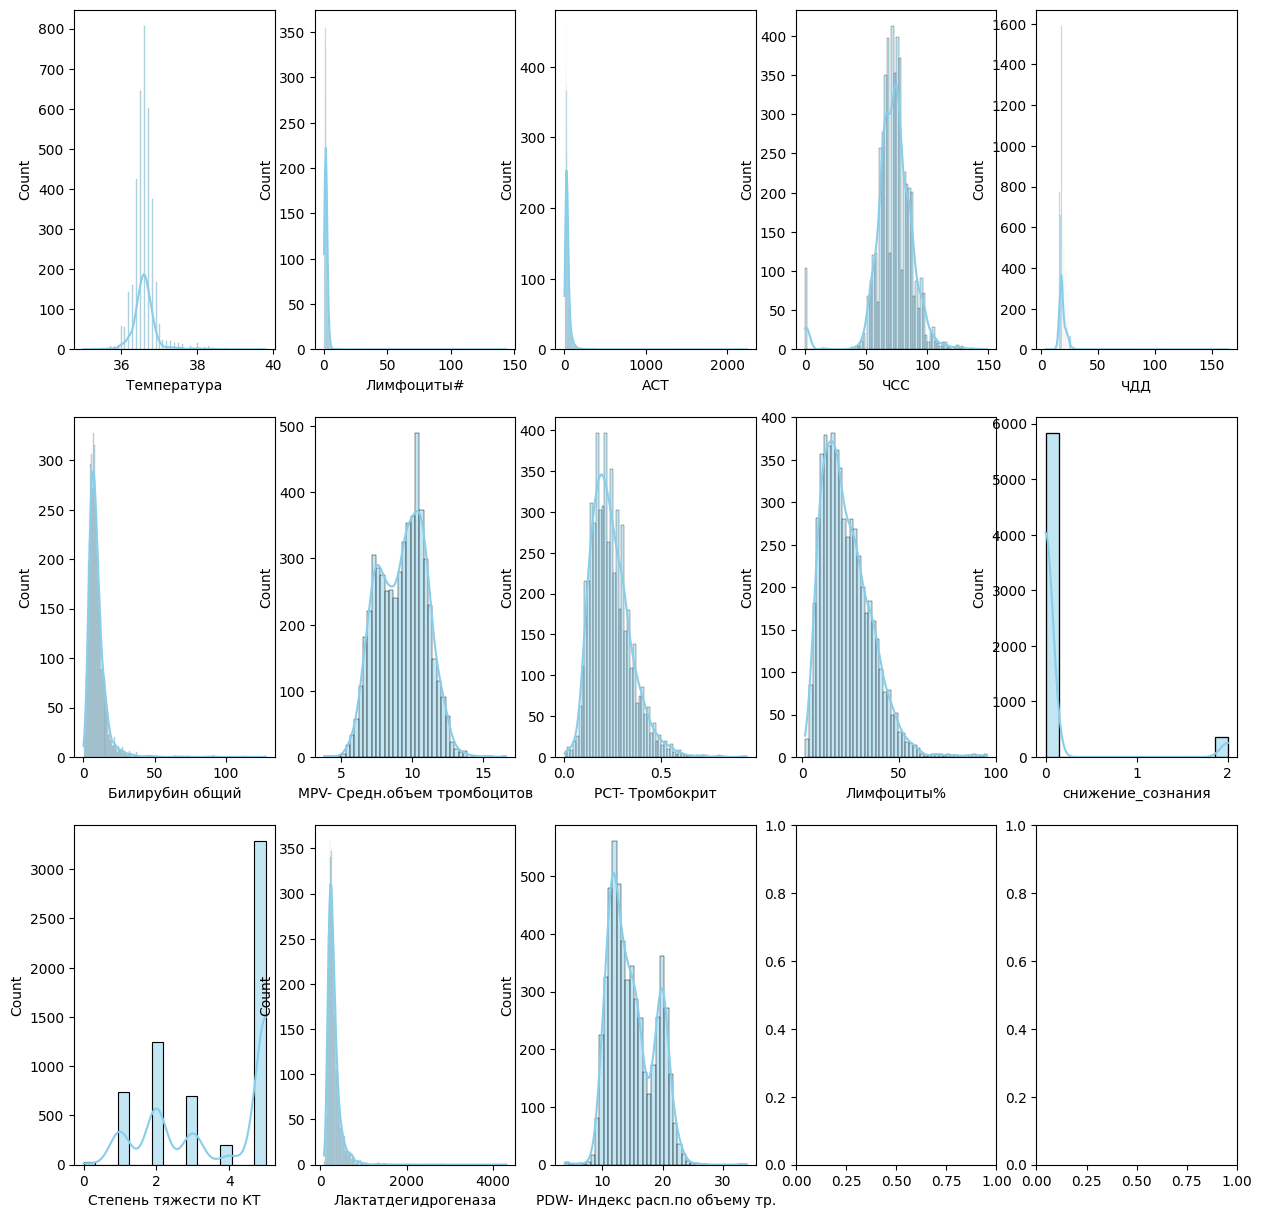

In [10]:
figure, ax = plt.subplots(3, 5, figsize=(15, 15))
dft = dinam_fact_df.loc
for i in range(13):
    sns.histplot(dinam_fact_df.iloc[:, i], color="skyblue", kde=True, ax=ax[i//5, i%5])

Healed:  1860  died:  132


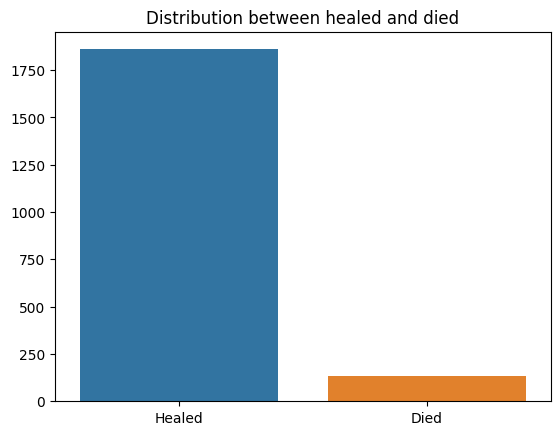

In [11]:
data = df.groupby("case")["outcome_tar"].mean().value_counts()
print("Healed: ", data.values[0], " died: ", data.values[1])
sns.barplot(x = ["Healed", "Died"], y = data.values)
plt.title("Distribution between healed and died")
plt.show()

## Снижение сознания
Lets see the count of "снижение сознания" along all patients

Text(0.5, 1.0, 'Distribution of снижение сознания')

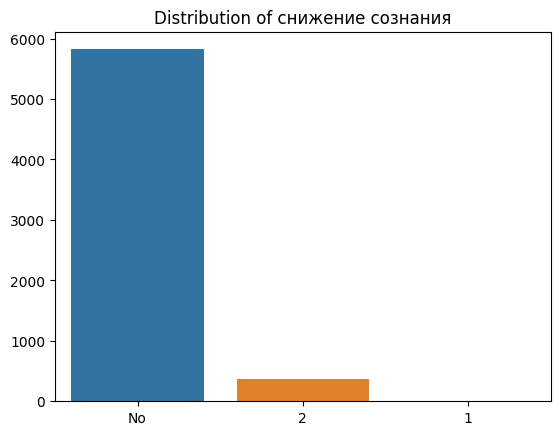

In [12]:
data = df["снижение_сознания"].value_counts()
sns.barplot(x = ["No", "2", "1"], y = data.values)
plt.title("Distribution of снижение сознания")

Better to do this binary value

In [13]:
df.loc[df["снижение_сознания"]==2, "снижение_сознания"] = 1

Text(0.5, 1.0, 'Distribution of снижение сознания')

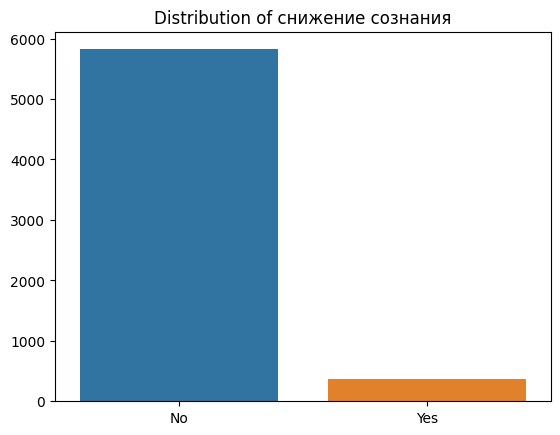

In [14]:
data = df["снижение_сознания"].value_counts()
sns.barplot(x = ["No", "Yes"], y = data.values)
plt.title("Distribution of снижение сознания")

## CT severity level
Good! Next modify CT scores

Text(0.5, 1.0, 'Distribution of level of severity on CT')

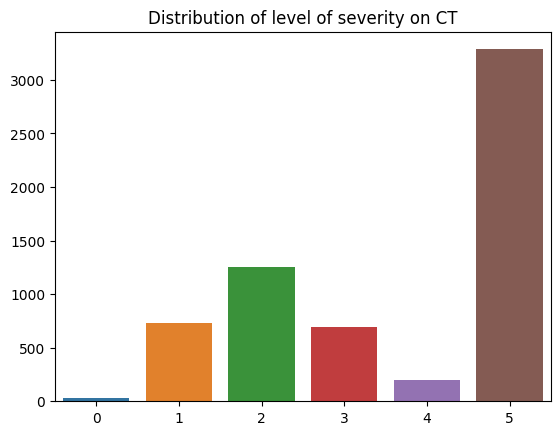

In [15]:
data = df["Cтепень тяжести по КТ"].value_counts()
sns.barplot(x = data.keys(), y = data.values)
plt.title("Distribution of level of severity on CT")

Here we need to think:
a) how possible that on the end of desision CT severity is not 0?
b) can we join groups

In [16]:
display("Distribution of classes CT for healed")
pd.DataFrame(df[df["outcome_tar"] == 0][df["end_epizode"] == 1]["Cтепень тяжести по КТ"].value_counts())

'Distribution of classes CT for healed'

C:\Users\sirau\AppData\Local\Temp\ipykernel_3380\2811034731.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pd.DataFrame(df[df["outcome_tar"] == 0][df["end_epizode"] == 1]["Cтепень тяжести по КТ"].value_counts())


,Cтепень тяжести по КТ
5,1726
2,172
1,119
3,78
4,10
0,6


In [17]:
display("Distribution of classes CT for died persons")
pd.DataFrame(df[df["outcome_tar"] == 1][df["end_epizode"] == 1]["Cтепень тяжести по КТ"].value_counts())


'Distribution of classes CT for died persons'

C:\Users\sirau\AppData\Local\Temp\ipykernel_3380\1392771291.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pd.DataFrame(df[df["outcome_tar"] == 1][df["end_epizode"] == 1]["Cтепень тяжести по КТ"].value_counts())


,Cтепень тяжести по КТ
5,112
4,22
3,10
2,8


Text(0.5, 1.0, 'Distribution of level of severity on CT')

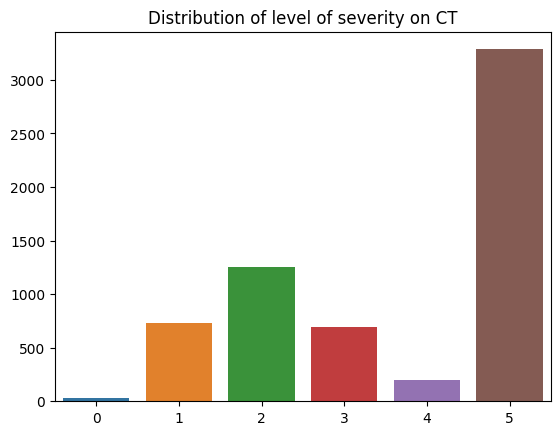

In [18]:
data = df["Cтепень тяжести по КТ"].value_counts()
data
sns.barplot(x = data.keys(), y = data.values)
plt.title("Distribution of level of severity on CT")

For the first step lets stay it unanswered

## Temperature 
Lets discuss temperature

<AxesSubplot: xlabel='Температура'>

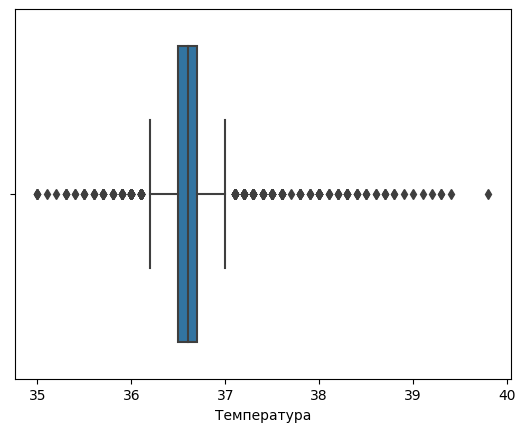

In [19]:
sns.boxplot(data=df, x="Температура")

<BarContainer object of 46 artists>

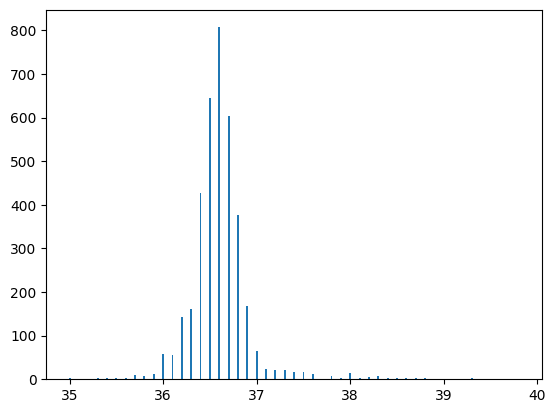

In [20]:
data = df["Температура"].value_counts()
plt.bar(x=data.keys(), height=data.values, width=0.02)

This anomalies can lead to low prediction quality for 37+

- Now I can move 36< to 36

- And 39+ to 39

Its quite strange that high temperatures are not so distributed

In [21]:
temp_df = df["Температура"].copy()

In [22]:
start_indexes = filter(lambda x: x[1] == 0, temp_df.index)
df.loc[start_indexes, "Температура"].value_counts()

36.7    208
36.6    208
36.8    152
36.5    147
36.4     89
36.9     80
36.3     44
37.0     39
36.2     39
37.3     19
37.2     18
36.0     16
37.1     14
36.1     13
38.0     13
37.6     12
37.5     11
37.4     10
37.8      7
38.3      7
35.9      5
35.7      5
38.2      4
38.1      3
38.5      3
37.9      2
38.7      2
38.4      2
39.3      2
35.8      2
35.3      2
38.8      2
35.4      1
35.0      1
38.6      1
39.8      1
39.0      1
35.6      1
38.9      1
35.5      1
39.1      1
39.4      1
39.2      1
Name: Температура, dtype: int64

In [57]:
tmp_patients = df.groupby(level=0).apply(lambda x: x['Температура'].values)
train_set = tmp_patients.apply(lambda x: x[:-1])
test_set = tmp_patients.apply(lambda x: x[-1])
pred_set = train_set.apply(lambda x: round(np.mean(x), 1))
print(f"{round((np.sum(np.abs((test_set-pred_set)/test_set))/test_set.shape[0])*100, 2)}%")

0.38%


D:\covid\covid\venv\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [ ]:
tmp_patients = 